In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from ErrorCalculator import ErrorCalculator
from Plotter import Plotter
from ScatterPlotter import  ScatterPlotter

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,Unnamed: 0,salary,exprior,yearsworked,yearsrank,market,yearsabs,degree_yes degree,otherqual_yes other qual,position_Junior,position_Manager,male_male,Field_Finance,Field_Human Resources,Field_Marketing
0,419,34603.0,0,6,4,0.79,1,1,0,1,0,0,1,0,0
1,135,53543.0,9,4,4,1.17,1,1,0,0,1,1,0,0,0
2,386,33800.0,0,0,0,0.84,4,1,0,1,0,0,0,1,0
3,122,49667.0,0,12,4,0.88,0,1,0,0,1,1,1,0,0
4,22,34731.0,1,1,1,0.85,3,1,0,1,0,1,0,0,1


In [3]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,Unnamed: 0,salary,exprior,yearsworked,yearsrank,market,yearsabs,degree_yes degree,otherqual_yes other qual,position_Junior,position_Manager,male_male,Field_Finance,Field_Human Resources,Field_Marketing
0,283,62091.0,0,23,14,1.13,0,1,0,0,0,1,0,0,0
1,100,42482.0,0,9,4,0.99,0,1,0,0,1,1,0,0,1
2,37,46292.0,1,2,2,1.14,0,1,0,1,0,1,1,0,0
3,46,59110.0,0,4,4,1.33,0,1,0,1,0,1,0,0,0
4,375,89789.0,11,22,21,0.93,2,1,0,0,0,1,1,0,0


## The distribution of salary

Text(0.5, 0, 'salary')

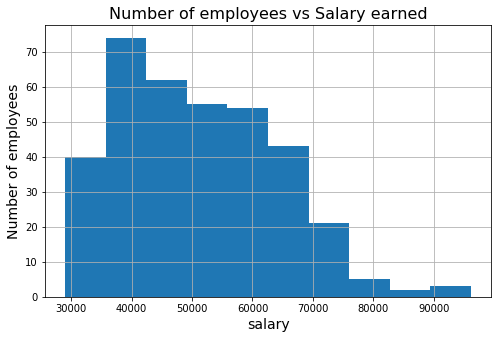

In [4]:
train_data.hist('salary',figsize=(8,5))
plt.title('Number of employees vs Salary earned',fontsize=16)
plt.ylabel('Number of employees',fontsize=14)
plt.xlabel("salary",fontsize=14)

## The distribution of log-transformed salary

In [5]:
train_data['log_salary'] = np.log(train_data['salary'])
test_data['log_salary'] =np.log(test_data['salary'])

Text(0.5, 0, 'salary')

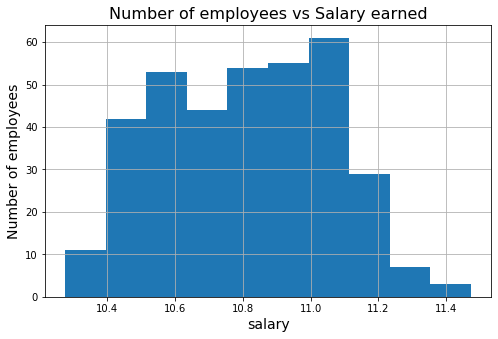

In [6]:
train_data.hist('log_salary',figsize=(8,5))
plt.title('Number of employees vs Salary earned',fontsize=16)
plt.ylabel('Number of employees',fontsize=14)
plt.xlabel("salary",fontsize=14)

In [7]:
y_train = train_data['salary']
y_test = test_data['salary']
y_trainlog = train_data['log_salary']
y_testlog = test_data['log_salary']
train_datamodel1 = train_data[['yearsrank','position_Junior','position_Manager']]
train_datamodel2 = train_data[['position_Junior','position_Manager']]

In [8]:
train_datamodel1 = sm.add_constant(train_datamodel1)
model = sm.OLS(y_train,train_datamodel1).fit()
model.save('model.pickle')



/home/olebogeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
train_datamodel1 = sm.add_constant(train_datamodel1)
model1 = sm.OLS(y_trainlog,train_datamodel1).fit()
model1.save('model1.pickle')


In [10]:
train_datamodel2 = sm.add_constant(train_datamodel2)
model2 = sm.OLS(y_trainlog,train_datamodel2).fit()
model2.save('model2.pickle')


In [11]:
test_datamodel1 = test_data[['yearsrank','position_Junior','position_Manager']]
test_datamodel1 = sm.add_constant(test_datamodel1)
test_datamodel2 = test_data[['position_Junior','position_Manager']]
test_datamodel2 = sm.add_constant(test_datamodel2)


In [12]:
model_prediction  = model.predict(test_datamodel1)
model1_prediction = model1.predict(test_datamodel1)
model2_prediction = model2.predict(test_datamodel2)

In [13]:
modelError = ErrorCalculator(y_test,model_prediction)
model1Error = ErrorCalculator(y_testlog,model1_prediction)
model2Error = ErrorCalculator(y_testlog,model2_prediction)
print('The RMSE of model is:',modelError.get_rmse())
print('The RMSE of model1 is:',model1Error.get_rmse())
print('The RMSE of model1 is:',model2Error.get_rmse())



The RMSE of model is: 8141.492924033082
The RMSE of model1 is: 0.1624117451565314
The RMSE of model1 is: 0.17478870720459333


| Model name  | Description                                  | R-squared | Accuracy(RMSE)    |
| ----------  | -------------------------------------------  | --------- |-------------------|
| model      | Multivariate                                 | .619      |8141.492924033082  |
| model1      | Multivariate with log-salary                 | .631      |0.1624117451565314 |
| model2      | Removed  yearsrank from the features         | .548      |0.17478870720459333|

The  log-transformed salary  model (model1) performes better than the initial model
in which the target feature is not log transformed. When the feature  yearsrank  is removed the model 
(model2) perfomes worse which shows that it is indeed a significant feature.

## Checking normality of variance

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. If the histogram indicates that random error is not normally distributed, it suggests that the model's underlying assumptions may have been violated.

In [14]:
plottermodel = Plotter(y_test,model_prediction)
plottermodel1 = Plotter(y_testlog,model1_prediction)
plottermodel2 = Plotter(y_testlog,model2_prediction)

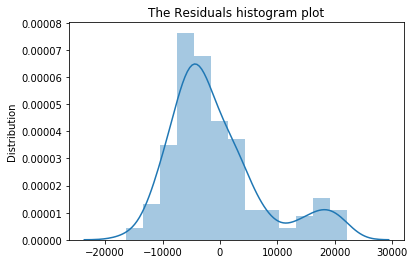

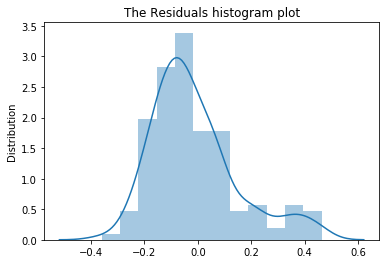

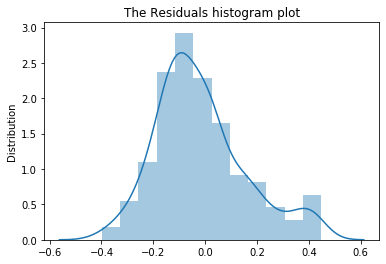

In [15]:
plottermodel.run_calculations()
plottermodel1.run_calculations()
plottermodel2.run_calculations()
plottermodel.plot()
plottermodel1.plot()
plottermodel2.plot()


model2 is the one that is most approximately normally distributed
which make it seem that it is the best model by far.

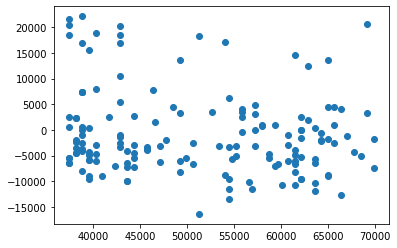

In [16]:
scatterplot =ScatterPlotter(y_test,model_prediction)
scatterplot.plot() 

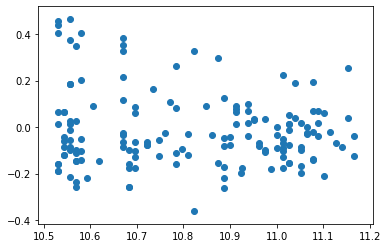

In [17]:
scatterplot1 = ScatterPlotter(y_testlog,model1_prediction)
scatterplot1.plot()

The scatterplot shows that residuals for model and model1 
are more randomly scattered with no evident relationship.

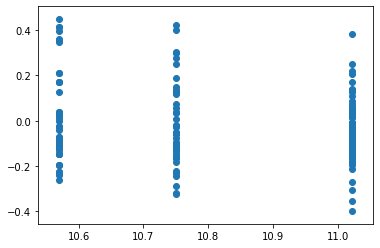

In [18]:
scatterplot2 = ScatterPlotter(y_testlog,model2_prediction)
scatterplot2.plot()

When the variable yearsrank is removed only categorical features are 
left hence the above relationship depicted.